# **Klasifikasi Gambar Buah dan Sayur Menggunakan Support Vector Machine (SVM)**

# 1. Loading Dataset

In [5]:
import os
import numpy as np
from PIL import Image

data_dir = '../data/fv_image_dataset'
IMG_SIZE = (32, 32) 

features = []
labels = []

for label in os.listdir(data_dir):
    folder = os.path.join(data_dir, label)
    if os.path.isdir(folder):
        for img_name in os.listdir(folder):
            if img_name.endswith(('.jpg', '.png', '.jpeg')):
                img_path = os.path.join(folder, img_name)
                img = Image.open(img_path).convert('RGB').resize(IMG_SIZE)
                img_array = np.array(img).flatten()
                features.append(img_array)
                labels.append(label)

# 2. Informasi Data

In [7]:
import pandas as pd

df = pd.DataFrame(features)
df['label'] = labels

# menampilkan info detail
df.info()

# menampilkan statistik deskriptif
df.describe()

# cek nilai pada kolom label
print(df['label'].unique())

# menghitung jumlah pada kolom label
print(df['label'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Columns: 3073 entries, 0 to label
dtypes: object(1), uint8(3072)
memory usage: 1.0+ MB
['apple' 'banana' 'beetroot' 'bell pepper' 'cabbage' 'capsicum' 'carrot'
 'cauliflower' 'chilli pepper' 'corn' 'cucumber' 'eggplant' 'garlic'
 'ginger' 'grapes' 'jalepeno' 'kiwi' 'lemon' 'lettuce' 'mango' 'onion'
 'orange' 'paprika' 'pear' 'peas' 'pineapple' 'pomegranate' 'potato'
 'raddish' 'soy beans' 'spinach' 'sweetcorn' 'sweetpotato' 'tomato'
 'turnip' 'watermelon']
label
bell pepper      10
beetroot         10
cucumber         10
cabbage          10
sweetpotato      10
soy beans        10
corn             10
chilli pepper    10
eggplant         10
jalepeno         10
ginger           10
garlic           10
lettuce          10
lemon            10
mango            10
kiwi             10
pear             10
paprika          10
orange           10
onion            10
turnip           10
tomato           10
spinach          10
s

# 3. Pemilihan Fitur

In [8]:
X = df.drop('label', axis=1)
y = df['label']

# 4. Split data dan bangun model SVM

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(kernel='linear')
model.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


# 5. Evaluasi Akurasi & Report Klasifikasi

In [9]:
from sklearn.metrics import accuracy_score, classification_report

try:
    y_pred = model.predict(X_test)
    print("Akurasi:", accuracy_score(y_test, y_pred))
    print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))
except NameError as e:
    print(f"Error: {e}. Please ensure 'model', 'X_test', and 'y_test' are properly defined.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Error: name 'model' is not defined. Please ensure 'model', 'X_test', and 'y_test' are properly defined.


# 6. Confusion Matrix

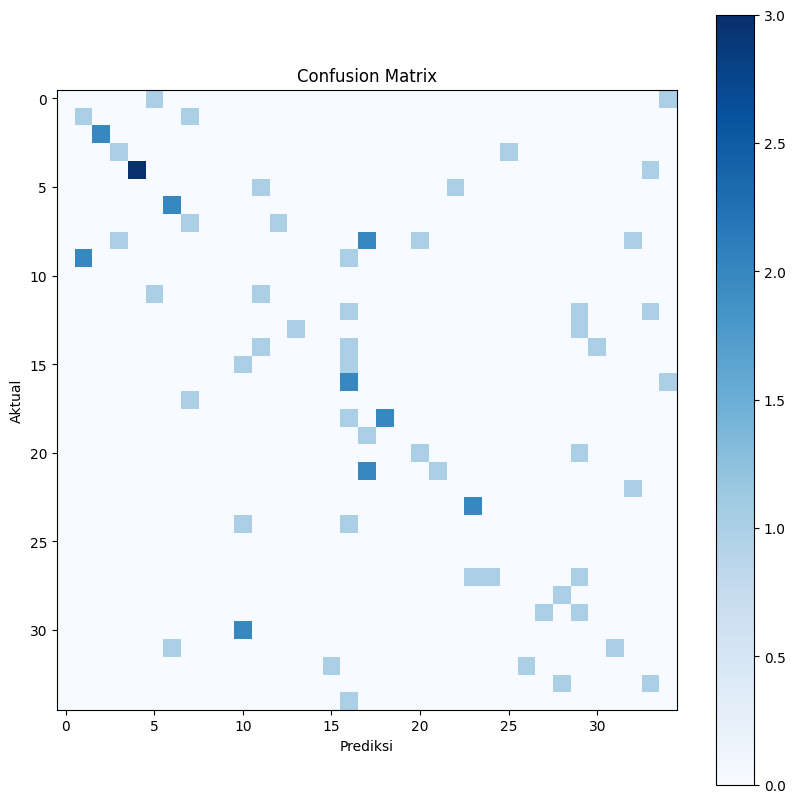

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.colorbar()
plt.show()

# 7.  Visualisasi Hasil Model SVM

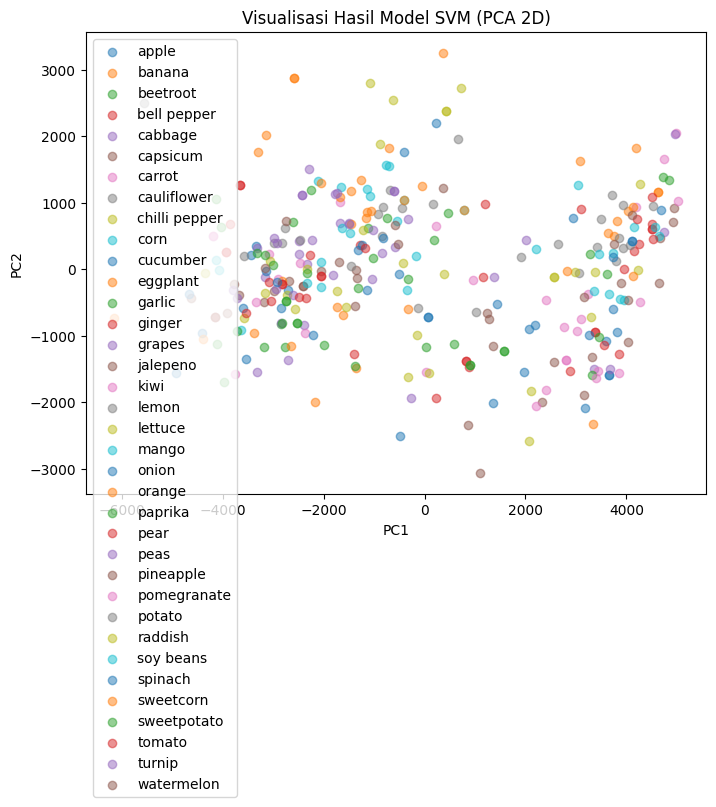

In [13]:
from sklearn.decomposition import PCA

# Reduksi dimensi ke 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualisasi hasil SVM (warna berdasarkan label)
plt.figure(figsize=(8,6))
for label in np.unique(y):
    idx = y == label
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=label, alpha=0.5)
plt.legend()
plt.title('Visualisasi Hasil Model SVM (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# 8. Visualisasi Hasil Model SVM (3D)

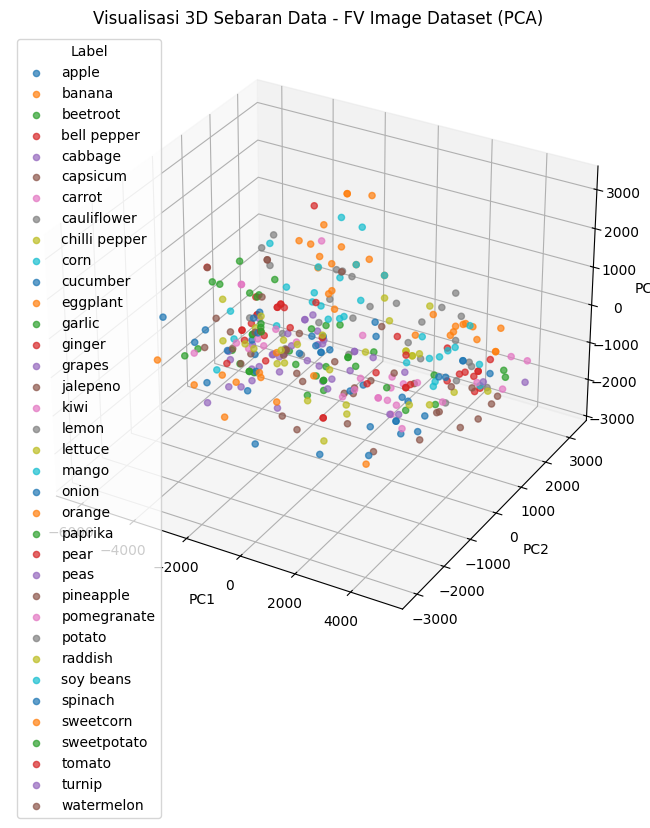

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduksi fitur gambar ke 3D dengan PCA
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Visualisasi: setiap label (buah/sayur) warna berbeda
for label in np.unique(y):
    idx = y == label
    ax.scatter(X_pca3[idx, 0], X_pca3[idx, 1], X_pca3[idx, 2], label=label, alpha=0.7)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Visualisasi 3D Sebaran Data - FV Image Dataset (PCA)')

ax.legend(title="Label", loc="upper left")
plt.show()